In [2]:
#Importing LIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the csv
df= pd.read_csv("https://raw.githubusercontent.com/Lordvarun23/MarketingAnalytics/main/Hotel%20Analysis/Sample%20hotel%20data.csv")

In [4]:
df.head(2)

,Hotel_Name_City,Review_Overall_Rating,date_of_review,Month_of_Visit,Review_Type,Rating_Value,Rating_Location,Rating_Sleep_Quality,Rating_Rooms,Rating_Cleanliness,Rating_Service
0,Bombay Hotel Jaipur,3,8/26/2014,Aug-14,with family,3.0,4.0,NaN,NaN,NaN,3.0
1,Bombay Hotel Jaipur,1,06-02-2013,Jun-13,NaN,1.0,2.0,NaN,1.0,1.0,3.0


 #### How many rows of data are there in dataset?

In [5]:
print("There are ",df.shape[0]," rows in the dataset")

There are  942  rows in the dataset


#### How many variables are there in the dataset?

In [6]:
print("There are ",df.shape[1]," columns in the dataset")

There are  11  columns in the dataset


#### What is the minimum value of the variable “Beat”?

In [ ]:
print("No of True Observations in Arrest variable is:",len(df[df["Arrest"]==True]))

No of True Observations in Arrest variable is: 15536


#### How many observations have a LocationDescription value of ALLEY

In [ ]:
print("No of True Observations have a LocationDescription value of ALLEY is:",len(df[df["LocationDescription"]=="ALLEY"]))

No of True Observations have a LocationDescription value of ALLEY is: 2308


#### In what format are the entries in the variable Date?

In [ ]:
print("The format of data column is:",df.dtypes["Date"])

The format of data column is: object


#### Create an histogram of variable Date. Crime increases are decreases in 2002-2012, 2005-2008,2009-2011

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.head(2)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6.0,69.0,2012,41.756284,-87.621645
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12.0,24.0,2012,41.898788,-87.661303


In [ ]:
#2002-2012
df_02_12 = df[(df["Date"]>="2002") & (df["Date"]<"2013")]

In [ ]:
min(df_02_12["Date"]),max(df_02_12["Date"])

(Timestamp('2002-01-01 00:00:00'), Timestamp('2012-12-31 23:15:00'))

Text(0, 0.5, 'No of Crimes')

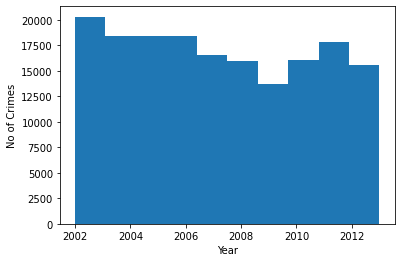

In [ ]:
plt.hist(df_02_12["Date"])
plt.xlabel("Year")
plt.ylabel("No of Crimes")

<b> Inference:</b> Crime Decreases and Increases

Text(0, 0.5, 'No of Crimes')

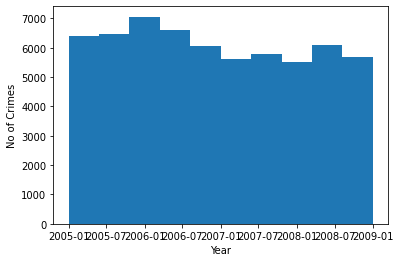

In [ ]:
#2005-2008
df_05_08 = df[(df["Date"]>="2005") & (df["Date"]<"2009")]
plt.hist(df_05_08["Date"])
plt.xlabel("Year")
plt.ylabel("No of Crimes")

<b> Inference:</b> Crime Increases and Decreases

Text(0, 0.5, 'No of Crimes')

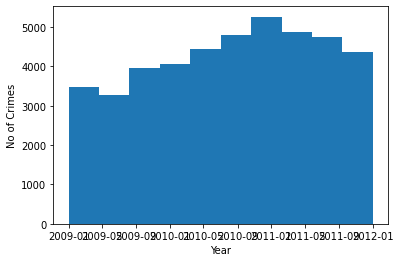

In [ ]:
#2009-2011
df_09_11 = df[(df["Date"]>="2009") & (df["Date"]<"2012")]
plt.hist(df_09_11["Date"])
plt.xlabel("Year")
plt.ylabel("No of Crimes")

<b> Inference:</b> Crime Increases

#### Create a boxplot of the variable "Date", sorted by the variable "Arrest" . Does it look like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period?

In [ ]:
df_sort_arrest = df[df["Arrest"]==True]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


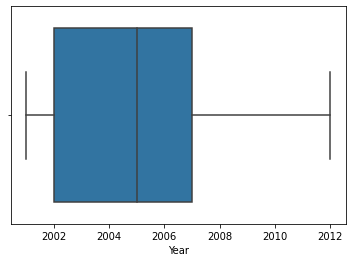

In [ ]:
import matplotlib.dates as mdates
sns.boxplot(df_sort_arrest["Year"])

In [ ]:
len(df_sort_arrest[df_sort_arrest["Year"]<=2005]),len(df_sort_arrest[df["Year"]>2005])

<ipython-input-70-d2181523420b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_sort_arrest[df_sort_arrest["Year"]<=2005]),len(df_sort_arrest[df["Year"]>2005])


(9286, 6250)

<b> Inference:</b> More no of Crime in First half

#### For what proportion of motor vehicle thefts in 2001 was an arrest made? Similarly for the year 2007, 2012

In [ ]:
print("The proporton of motor vehicle thefts in 2001 was an arrest made is :",round(len(df[(df["Arrest"]==True)&(df["Year"]==2001)])/len(df[df["Year"]==2001]),3)*100,"%")

The proporton of motor vehicle thefts in 2001 was an arrest made is : 10.4 %


In [ ]:
print("The proporton of motor vehicle thefts in 2007 was an arrest made is :",round(len(df[(df["Arrest"]==True)&(df["Year"]==2007)])/len(df[df["Year"]==2007]),3)*100,"%")

The proporton of motor vehicle thefts in 2007 was an arrest made is : 8.5 %


In [ ]:
print("The proporton of motor vehicle thefts in 2012 was an arrest made is :",round(len(df[(df["Arrest"]==True)&(df["Year"]==2012)])/len(df[df["Year"]==2012]),3)*100,"%")

The proporton of motor vehicle thefts in 2012 was an arrest made is : 3.9 %


#### Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category

In [ ]:
df.groupby(["LocationDescription"]).count()["ID"].sort_values(ascending=False)[:5]

LocationDescription
STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
Name: ID, dtype: int64